# The idea of fitting: Minimizing some functional

**In this tutorial we build our own fitter based on minimizing a functional!**

In [1]:
# Fast vectorized numeric operations
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# A function to minimize
from scipy.optimize import minimize

# Show plots directly in this notebook
%matplotlib inline

Let's define some random data:

In [2]:
N = 10
x_data = np.linspace(-1, 1, N)
y_data = -1 + 3 * x_data + 2 * np.random.random_sample(N)

And take a quick look at it:

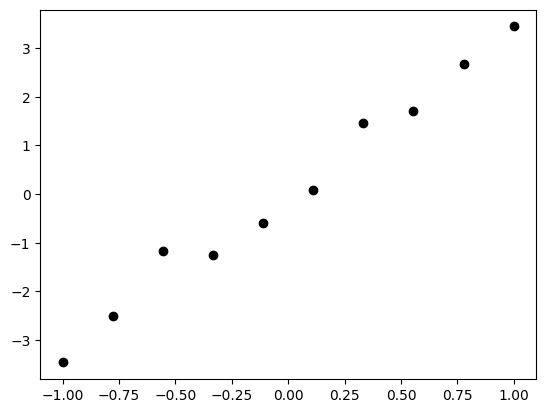

In [3]:
plt.plot(x_data, y_data, 'ko')

This looks like a line, so this is what we want to fit:

In [4]:
def line(x, params):
    return params[0] * x + params[1]

The line is defined as $f(\vec x) = a \vec x + b$ and maps a vector of x coordinates to y coordinates.
The two parameters a and b are collected in vector ``params``.

Now the idea is to minimize the distance of our function ``line`` to the y coordinates of the data, so we define
another function ``chi2``, which, for every set of parameters returns the sum of the squared distances of data points to function values:

In [5]:
def chi2(params):
    return np.sum(np.square(y_data - line(x_data, params)))

Let's look at this step by step: 

* ``line(x_data, params)``: Here we passed on the parameters of ``chi2`` to the line function which we evaluate for all the data x values. The result is a vector y values.
* ``y_data - line(x_data, params)``: This is then the vector of distances between the data y values and the y values of our function
* ``np.square(y_data - line(x_data, params))``: The vector of squared distances
* ``np.sum(np.square(y_data - line(x_data, params)))``: Summing everything up

Now all we have to do is minimize these distances.
For this we use the minimizer [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html). It needs start points, which we just set to ``(0, 1)``

In [6]:
result = minimize(chi2, (0, 1))

Note how ``minimize`` is a higher order function, that takes a function as first argument!

The results object contains quite a lot of useful information, but we just want the values of our parameters:

In [7]:
result.x

array([3.31564388, 0.04163693])

Now let's see how well we fitted:

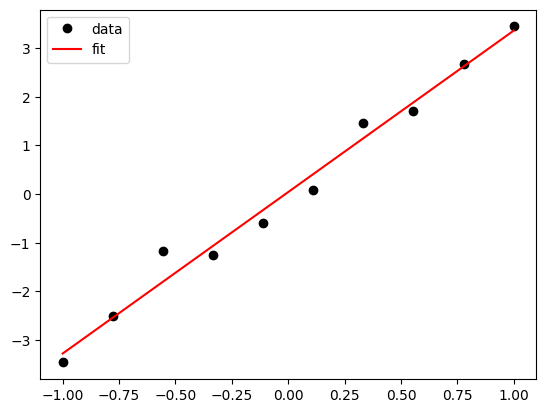

In [8]:
# Plotting our data point
plt.plot(x_data, y_data, 'ko', label="data")
plt.plot(x_data, line(x_data, result.x), "r-", label="fit")
plt.legend()

What we just did is called a "Least Square Fit"

Fitting an arbitrary (non-linear) Function to  weighted points (= measurements with uncertainties).

**Basic principle:**  
Minimize $\chi^2$, the quadratic difference between measurement points and fit, weighted by inverse uncertainty squared:

$$ \chi^2 = \sum \frac{(y_{meas}-y_{fit})^2}{  ( \Delta y )^2} $$

The resulting value for $\chi^2$ is an important check whether the fitting model is sensible:

$$ \left< \frac{\chi^2}{  (n_{points} - n_{par} )} \right> \approx 1$$

$n_{points} - n_{par}$ is the number of degrees of freedom (ndf) in our optimization problem.

<div class="alert alert-block alert-info">
    <b>Note:</b> In our example with the line we didn't divide by the uncertainty in the definition of <code>chi2</code>, so we made the implicit assumption that all data points are equally weighted. Not knowing the uncertainty of the data points also means we can't use $\chi^2$ to test goodness of fit by comparing it to the number of degrees of freedom.
</div>